In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Project_3.csv')

## Q1 Which company has the higher analyst coverage?

In [3]:
df['BBTICKER'].value_counts()

ADS GR Equity      44
SAP GR Equity      42
ASML NA Equity     41
AZN LN Equity      40
MC FP Equity       38
                   ..
HEIO NA Equity      5
RYAAY US Equity     5
RO SW Equity        3
BMW3 GR Equity      2
UHRN SW Equity      2
Name: BBTICKER, Length: 360, dtype: int64

In [4]:
bbticker=df['BBTICKER'].unique()
num_c=[]
for i in bbticker:
    data=df[df['BBTICKER']==i].copy
    num_analyst=df[df['BBTICKER']==i]['ANALYST'].unique().shape[0]
    num_c.append(num_analyst)
num_c=np.array(num_c)

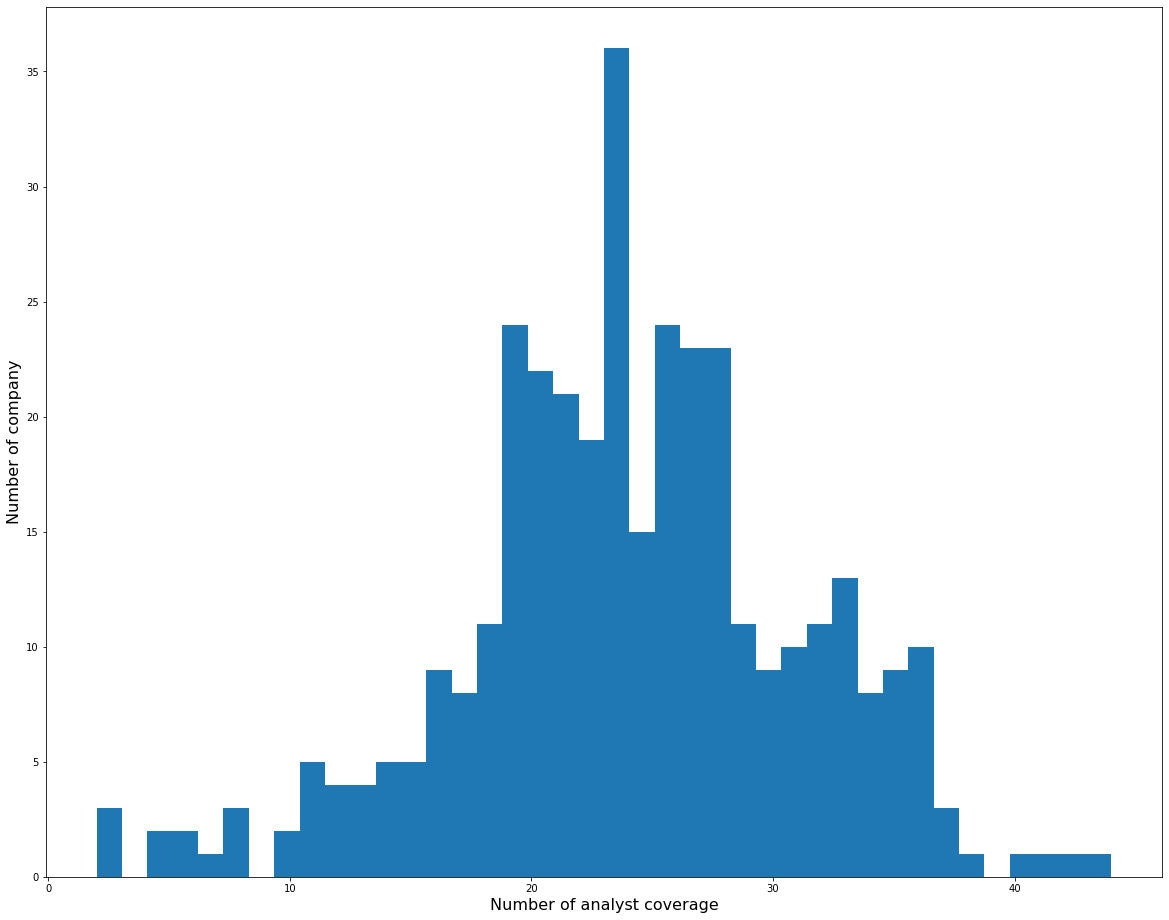

In [5]:
plt.figure(figsize=(20,16))
plt.xlabel('Number of analyst coverage',size=16)
plt.ylabel('Number of company',size=16)
plt.hist(num_c,bins=40)
plt.savefig('Q1.jpg')
plt.show()

In [6]:
print(f"The company that has the highest analyst coverage is {bbticker[np.where(num_c==num_c.max())][0]}, and the number of analyst is {num_c.max()}." )

The company that has the highest analyst coverage is ADS GR Equity, and the number of analyst is 44.


## Q2 Which analyst covers the most companies?

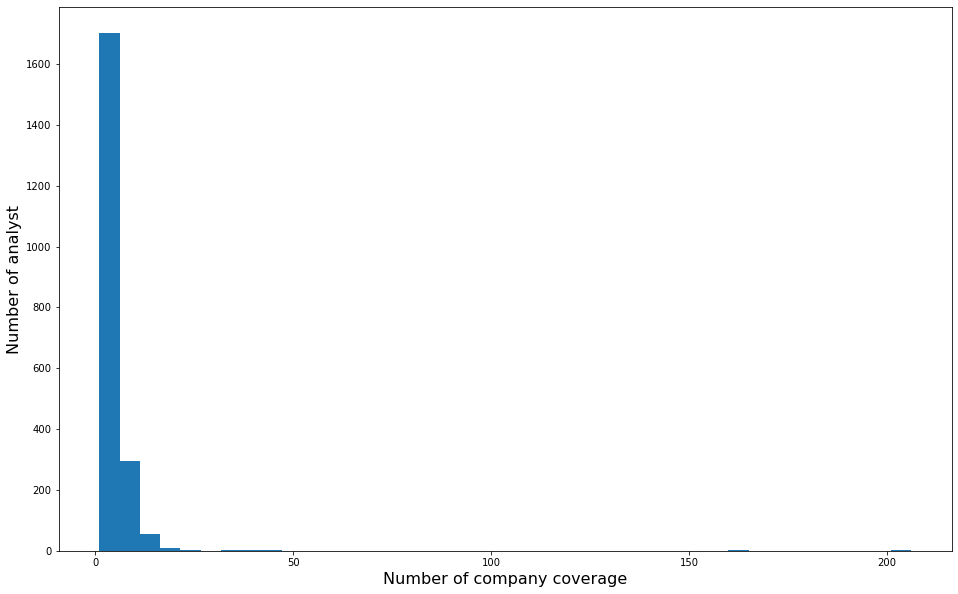

In [7]:
plt.figure(figsize=(16,10))
plt.xlabel('Number of company coverage',size=16)
plt.ylabel('Number of analyst',size=16)
plt.hist(df['ANALYST'].value_counts(),bins=40)
plt.savefig('Q2.jpg')
plt.show()

## Q3 Based on how analysts organize themselves into covering companies, 
## a. Could you model the similarity or conversely, the distance matrix between the companies based on this analyst co-coverage

## Distance by similarity

In [8]:
distance = pd.DataFrame(columns = df.BBTICKER.unique(),index = df.BBTICKER.unique())

In [9]:
Analyst = df.ANALYST.value_counts()
for i in range(len(distance.columns)):
    for j in range(len(distance.columns)):
        A = df.ANALYST[df.BBTICKER == distance.columns[i]].unique()
        B = df.ANALYST[df.BBTICKER == distance.columns[j]].unique()
        AB = list(set(A) & set(B))
        distance.iloc[i, j] = 0
        if (i==j): distance.iloc[i, j] = 0
        else:
            for k in AB:
                distance.iloc[i, j] += 1/Analyst[Analyst.index == k][0]
distance

,NESN SW Equity,ROG SW Equity,NOVN SW Equity,HSBA LN Equity,SAP GR Equity,AZN LN Equity,ASML NA Equity,SAN FP Equity,MC FP Equity,FP FP Equity,...,TKA GR Equity,MCRO LN Equity,SESG FP Equity,TITR IM Equity,BIRG ID Equity,TUI LN Equity,GFS LN Equity,LHA GR Equity,BMW3 GR Equity,UHRN SW Equity
NESN SW Equity,0,0.006173,0.006173,0.064996,0.069851,0.006173,0.011027,0.006173,0.119851,0.011027,...,0,0.004854,0.004854,0,0.004854,0.004854,0,0,0,0
ROG SW Equity,0.006173,0,4.172021,0.006173,0.077601,4.033926,0.106173,2.433926,0.006173,0.106173,...,0,0,0,0,0,0,0,0,0,0
NOVN SW Equity,0.006173,4.172021,0,0.006173,0.077601,3.447129,0.106173,3.176783,0.006173,0.106173,...,0,0,0,0,0,0,0,0,0,0
HSBA LN Equity,0.064996,0.006173,0.006173,0,0.064996,0.006173,0.006173,0.006173,0.064996,0.006173,...,0,0,0,0,0.89561,0,0,0,0,0
SAP GR Equity,0.069851,0.077601,0.077601,0.064996,0,0.006173,0.378884,0.097082,0.069851,0.011027,...,0,0.87668,0.004854,0,0.004854,0.067354,0,0.0625,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUI LN Equity,0.004854,0,0,0,0.067354,0,0.067354,0,0.004854,0.004854,...,0,0.004854,0.004854,0,0.004854,0,0,0.0625,0,0
GFS LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LHA GR Equity,0,0,0,0,0.0625,0,0.0625,0,0,0.109649,...,0.501806,0,0,0,0,0.0625,0,0,0,0
BMW3 GR Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Distance by difference(co-coverance)
'''
for i in range(len(distance.columns)):
    for j in range(len(distance.columns)):
        A = df.ANALYST[df.BBTICKER == distance.columns[i]].unique()
        B = df.ANALYST[df.BBTICKER == distance.columns[j]].unique()
        distance.iloc[i, j] = len(list(set(A) & set(B)))
distance
'''

'\nfor i in range(len(distance.columns)):\n    for j in range(len(distance.columns)):\n        A = df.ANALYST[df.BBTICKER == distance.columns[i]].unique()\n        B = df.ANALYST[df.BBTICKER == distance.columns[j]].unique()\n        distance.iloc[i, j] = len(list(set(A) & set(B)))\ndistance\n'

## b. How would the results change if you were to restrict the dataset to only analysts having companies covered within 1s.d. of the distribution found in Qn. 2?

In [11]:
# Adjusted distance1   Analyst from 3 to 20

analyst=df['ANALYST'].unique()
bbticker=df['BBTICKER'].unique()
num_a=[]
for i in analyst:
    num_company=df[df['ANALYST']==i]['BBTICKER'].unique().shape[0]
    num_a.append(num_company)
    
num_a=np.array(num_a)
num_a_copy=num_a.copy()
num_a.sort()

selected_a=analyst[np.where((num_a_copy<=20)&(num_a_copy>=3))]
df31=pd.DataFrame([])
for i in selected_a:
    df31=pd.concat([df31,df[df.ANALYST==i]])
distance1 = pd.DataFrame(columns = df31.BBTICKER.unique(),index = df31.BBTICKER.unique())
for i in range(len(distance1.columns)):
    for j in range(len(distance1.columns)):
        A = df31.ANALYST[df31.BBTICKER == distance1.columns[i]].unique()
        B = df31.ANALYST[df31.BBTICKER == distance1.columns[j]].unique()
        AB = list(set(A) & set(B))
        distance1.iloc[i, j] = 0
        if (i==j): distance1.iloc[i, j] = 0
        else:
            for k in AB:
                distance1.iloc[i, j] += 1/Analyst[Analyst.index == k][0]

distance1

,NESN SW Equity,UNA NA Equity,ULVR LN Equity,BN FP Equity,GIVN SW Equity,KYG ID Equity,HEN3 GR Equity,SY1 GR Equity,LISN SW Equity,LISP SW Equity,...,URW NA Equity,GFC FP Equity,LI FP Equity,LAND LN Equity,SGRO LN Equity,BLND LN Equity,PRX NA Equity,MNDI LN Equity,SKG ID Equity,RYAAY US Equity
NESN SW Equity,0,2.874071,1.648674,3.42169,0.502632,0.46765,1.381214,0.302632,0.927356,1.026623,...,0,0,0,0,0,0,0,0,0,0
UNA NA Equity,2.874071,0,1.716135,2.735182,0.135965,0.312888,1.575659,0.135965,0.560689,0.588528,...,0,0,0,0,0,0,0,0,0,0
ULVR LN Equity,1.648674,1.716135,0,1.565341,0.135965,0.384317,1.27169,0.135965,0.417832,0.3171,...,0,0,0,0,0,0,0,0,0,0
BN FP Equity,3.42169,2.735182,1.565341,0,0.302632,0.634317,1.422881,0.302632,0.727356,0.826623,...,0,0,0,0,0,0,0,0,0,0
GIVN SW Equity,0.502632,0.135965,0.135965,0.302632,0,0.894298,0.185965,2.859017,0.283333,0.45,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLND LN Equity,0,0,0,0,0,0,0,0,0,0,...,1.571825,0.578968,1.178968,3.028968,3.371825,0,0,0,0,0
PRX NA Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MNDI LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.563492,0
SKG ID Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.563492,0,0


## c. If further restricted to a smaller subset?

In [12]:
# Adjusted distance2  Restricted by percentile
diff = 0.2

analyst=df['ANALYST'].unique()
bbticker=df['BBTICKER'].unique()
num_a=[]
for i in analyst:
    num_company=df[df['ANALYST']==i]['BBTICKER'].unique().shape[0]
    num_a.append(num_company)
    
num_a=np.array(num_a)
num_a_copy=num_a.copy()
num_a.sort()
restrict_num1=num_a[round(num_a.shape[0]*(1-diff))]
restrict_num2=num_a[round(num_a.shape[0]*diff)]
selected_a=analyst[np.where((num_a_copy<restrict_num1)&(num_a_copy>restrict_num2))]
df32=pd.DataFrame([])
for i in selected_a:
    df32=pd.concat([df32,df[df.ANALYST==i]])
distance2 = pd.DataFrame(columns = df32.BBTICKER.unique(),index = df32.BBTICKER.unique())
for i in range(len(distance2.columns)):
    for j in range(len(distance2.columns)):
        A = df32.ANALYST[df32.BBTICKER == distance2.columns[i]].unique()
        B = df32.ANALYST[df32.BBTICKER == distance2.columns[j]].unique()
        AB = list(set(A) & set(B))
        distance2.iloc[i, j] = 0
        if (i==j): distance2.iloc[i, j] = 0
        else:
            for k in AB:
                distance2.iloc[i, j] += 1/Analyst[Analyst.index == k][0]

distance2

,NESN SW Equity,UNA NA Equity,OR FP Equity,BN FP Equity,ADS GR Equity,CA FP Equity,LISP SW Equity,ADEN SW Equity,GIVN SW Equity,SGSN SW Equity,...,SPX LN Equity,SMDS LN Equity,PSN LN Equity,BDEV LN Equity,TW/ LN Equity,BKG LN Equity,MNDI LN Equity,CCL LN Equity,RYAAY US Equity,ORK NO Equity
NESN SW Equity,0,0.85,0.25,1.35,0.2,0.2,0.4,0.2,0.2,0.2,...,0,0,0,0,0,0,0,0,0,0
UNA NA Equity,0.85,0,0.25,0.85,0.2,0.2,0.2,0.2,0,0,...,0,0,0,0,0,0,0,0,0,0
OR FP Equity,0.25,0.25,0,0.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BN FP Equity,1.35,0.85,0.25,0,0.2,0.2,0.2,0.2,0,0,...,0,0,0,0,0,0,0,0,0,0
ADS GR Equity,0.2,0.2,0,0.2,0,0.45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BKG LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,1.7,1.7,2.033333,0,0,0,0,0
MNDI LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0.666667,0,0,0,0,0,0,0,0
CCL LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RYAAY US Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## set-index

In [13]:
df1 = df.drop('Unnamed: 0', axis = 1).set_index(["GICS_SECTOR_NAME", "GICS_INDUSTRY_GROUP_NAME"])
df1

ANALYST       DATE  \
GICS_SECTOR_NAME       GICS_INDUSTRY_GROUP_NAME                           
Consumer Staples       Food, Beverage & Tobacco     Jamrgett   3/5/2020   
                       Food, Beverage & Tobacco     Joneeney   3/3/2020   
                       Food, Beverage & Tobacco     MarDeboo   3/2/2020   
                       Food, Beverage & Tobacco     Niclberg   3/1/2020   
                       Food, Beverage & Tobacco     Antpagna  2/27/2020   
...                                                      ...        ...   
Industrials            Transportation               Inghmidt   4/7/2016   
Consumer Discretionary Automobiles & Components     Xavaroen   3/9/2018   
                       Automobiles & Components     FraMaury   4/4/2016   
                       Consumer Durables & Apparel  RenWeber   2/4/2020   
                       Consumer Durables & Apparel  Loiorvan  3/20/2017   

                                                   BROKER  RATING  \
GICS_SECTOR_NAME       GICS_INDUSTRY_GROUP_NAME                     
Consumer Staples       Food, Beverage & Tobacco     Beerg     5.0   
                       Food, Beverage & Tobacco     Corch     3.0   
                       Food, Beverage & Tobacco     Jeies     3.0   
                       Food, Beverage & Tobacco     Lirum     3.0   
                       Food, Beverage & Tobacco     ISEVA     5.0   
...                                                   ...     ...   
Industrials            Transportation               Hasse     1.0   
Consumer Discretionary Automobiles & Components     Br Co     3.0   
                       Automobiles & Components     OdBHF     2.0   
                       Consumer Durables & Apparel  Ba AG     3.0   
                       Consumer Durables & Apparel  Br Co     3.0   

                                                   RECOMMENDATION  \
GICS_SECTOR_NAME       GICS_INDUSTRY_GROUP_NAME                     
Consumer Staples       Food, Beverage & Tobacco               buy   
                       Food, Beverage & Tobacco       equalweight   
                       Food, Beverage & Tobacco              hold   
                       Food, Beverage & Tobacco              hold   
                       Food, Beverage & Tobacco        overweight   
...                                                           ...   
Industrials            Transportation                        sell   
Consumer Discretionary Automobiles & Components           neutral   
                       Automobiles & Components            reduce   
                       Consumer Durables & Apparel           hold   
                       Consumer Durables & Apparel        neutral   

                                                    TARGET_PRICE  \
GICS_SECTOR_NAME       GICS_INDUSTRY_GROUP_NAME                    
Consumer Staples       Food, Beverage & Tobacco     1.220000e+02   
                       Food, Beverage & Tobacco     1.050000e+02   
                       Food, Beverage & Tobacco     1.050000e+02   
                       Food, Beverage & Tobacco     1.070000e+02   
                       Food, Beverage & Tobacco    -2.420000e-14   
...                                                          ...   
Industrials            Transportation              -2.420000e-14   
Consumer Discretionary Automobiles & Components     8.800000e+01   
                       Automobiles & Components     8.900000e+01   
                       Consumer Durables & Apparel  5.000000e+01   
                       Consumer Durables & Apparel  3.050000e+02   

                                                          BBTICKER  
GICS_SECTOR_NAME       GICS_INDUSTRY_GROUP_NAME                     
Consumer Staples       Food, Beverage & Tobacco     NESN SW Equity  
                       Food, Beverage & Tobacco     NESN SW Equity  
                       Food, Beverage & Tobacco     NESN SW Equity  
                       Food, Beverage & Tobacco    

In [14]:
df2 = df.drop('Unnamed: 0', axis = 1).copy().dropna()

In [15]:
Distance = distance1

In [16]:
selected_b = Distance.index.unique()
df4=pd.DataFrame([])
for i in selected_b:
    df4=pd.concat([df4,df2[df2.BBTICKER == i]])

In [17]:
dfs = df4.drop_duplicates(['BBTICKER'])
dfs.index=range(len(dfs))
dfs

,ANALYST,DATE,BROKER,RATING,RECOMMENDATION,TARGET_PRICE,BBTICKER,GICS_SECTOR_NAME,GICS_INDUSTRY_GROUP_NAME
0,Jamrgett,3/5/2020,Beerg,5.0,buy,122.00,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
1,Pieegner,3/6/2020,OdBHF,5.0,buy,59.00,UNA NA Equity,Consumer Staples,Household & Personal Products
2,Laurisot,3/5/2020,Alope,4.0,add,4838.00,ULVR LN Equity,Consumer Staples,Household & Personal Products
3,Jonn Cox,3/6/2020,Keeux,3.0,hold,67.00,BN FP Equity,Consumer Staples,"Food, Beverage & Tobacco"
4,Marchnee,3/5/2020,Alope,2.0,reduce,3020.00,GIVN SW Equity,Materials,Materials
...,...,...,...,...,...,...,...,...,...
354,SanBunck,3/5/2020,Baays,1.0,underweight,460.00,BLND LN Equity,Real Estate,Real Estate
355,John Kim,3/4/2020,UBUBS,5.0,buy,80.00,PRX NA Equity,Consumer Discretionary,Retailing
356,RosKrige,3/5/2020,J.gan,3.0,neutral,1760.00,MNDI LN Equity,Materials,Materials
357,Pauadley,2/21/2020,Ciiti,5.0,buy,38.59,SKG ID Equity,Materials,Materials


## Q4 & Q5 &Q6

## Clustering

### Homogenous and Heterogenous by distance

In [59]:
import math

In [69]:
def dis(x1, y1, x2, y2):
    distance = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance

Dis = []
for i in (dfs['GICS_SECTOR_NAME'].unique()):
    try1 = dfs[dfs['GICS_SECTOR_NAME'] == i]
    index1 = try1.index
    testx = []
    testy = []
#     print(index1)
    for x, y in zip(X_tsne[index1, 0], X_tsne[index1, 1]):
        testx.append(x)
        testy.append(y)
    X = sum(testx)/len(index1)
    Y = sum(testy)/len(index1)
    Distance3 = []
    for m, n in zip(X_tsne[index1, 0], X_tsne[index1, 1]):
        Distance3.append(dis(m, n, X, Y))
    Dis.append(sum(Distance3)/len(Distance3))

distancedata = {'GICS_SECTOR_NAME': dfs['GICS_SECTOR_NAME'].unique().tolist(), 'Distance': Dis}
dis1 = pd.DataFrame(distancedata)
dis1.sort_values(by='Distance', ascending = True, ignore_index = True)

,GICS_SECTOR_NAME,Distance
0,Health Care,2.302836
1,Utilities,2.662624
2,Energy,2.708263
3,Real Estate,3.035293
4,Information Technology,4.303414
5,Financials,6.270991
6,Industrials,7.240057
7,Communication Services,7.582258
8,Consumer Staples,7.718867
9,Materials,8.765679


### 1.Kmeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(Distance)
y_kmeans = kmeans.predict(Distance) #可作为绘图颜色

### 2.Hierarchical

In [20]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

C:\Users\86132\AppData\Local\Temp\ipykernel_3164\2049802008.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(Distance, method  = "ward"))


Text(0.5, 1.0, 'ward method')

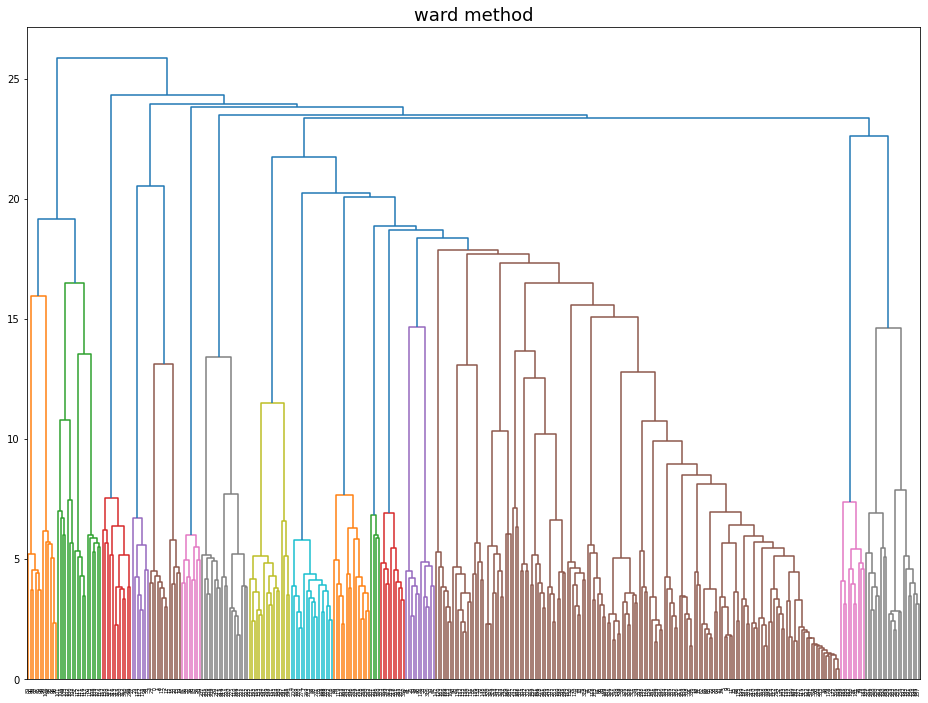

In [21]:
plt.figure(figsize = (16, 12))
dendrogram = sch.dendrogram(sch.linkage(Distance, method  = "ward"))
plt.title('ward method', size = 18)
#plt.savefig('HRP by ward')

In [22]:
link = linkage(Distance, method = 'ward')
from scipy.cluster.hierarchy import fcluster

max_d = 4
clusters1 = fcluster(link, max_d, criterion='maxclust')
print(clusters1)

max_d = 11
clusters2 = fcluster(link, max_d, criterion='maxclust')
print(clusters2)

[3 3 3 3 4 4 3 4 4 4 4 4 3 3 4 3 4 3 3 3 3 4 4 3 4 4 4 3 3 3 4 4 4 4 4 4 4
 4 3 4 4 4 4 4 4 1 4 4 4 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 1 1 1 1 4 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 2 2 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[ 4  4  4  4  8  9  4  8  9  9  9  9  4  4  9  4  9  4  4  4  4  9  9  4
  9  9  9  3  3  3  9  9  9  9  9  9  9  9  3  9  9  9  9  8  9  1  9  5
  5  1  1  1  9  5  5  5  5  5  9  5  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9 10 10  6 10  9  2  9  8  9  9  8 

C:\Users\86132\AppData\Local\Temp\ipykernel_3164\3701005727.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(Distance, method = 'ward')


## TSNE Visualization

In [23]:
from sklearn.manifold import TSNE
from sklearn import decomposition

### 1. By distance

In [24]:
# Fit and plot tSNE
#X = np.array(df2.drop(['BROKER','GICS_INDUSTRY_GROUP_NAME','DATE'], axis = 1))

#X_tsne = TSNE(n_components=2).fit_transform(X)
#fig = plt.figure()
#s = fig.add_subplot(1, 1, 1, xlabel='$x$', ylabel='$y$')
#s.scatter(X_tsne[:, 0], X_tsne[:, 1], c = X_color)
#plt.title(title + " - tSNE")

In [25]:
'''
X_pca = decomposition.PCA(n_components=2).fit_transform(Distance)
plt.figure(figsize = (16,12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 100, c = y_kmeans)

#for k,x,y in zip(dfs.BROKER,X_tsne[:, 0], X_tsne[:, 1]):                                     
#    plt.annotate('%s' %k, xy=(x,y), textcoords='data')
plt.title('PCA_Visualization by Kmeans')
'''

"\nX_pca = decomposition.PCA(n_components=2).fit_transform(Distance)\nplt.figure(figsize = (16,12))\nplt.scatter(X_pca[:, 0], X_pca[:, 1], s = 100, c = y_kmeans)\n\n#for k,x,y in zip(dfs.BROKER,X_tsne[:, 0], X_tsne[:, 1]):                                     \n#    plt.annotate('%s' %k, xy=(x,y), textcoords='data')\nplt.title('PCA_Visualization by Kmeans')\n"

D:\Anacoda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anacoda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'TSNE_Visualization by Kmeans')

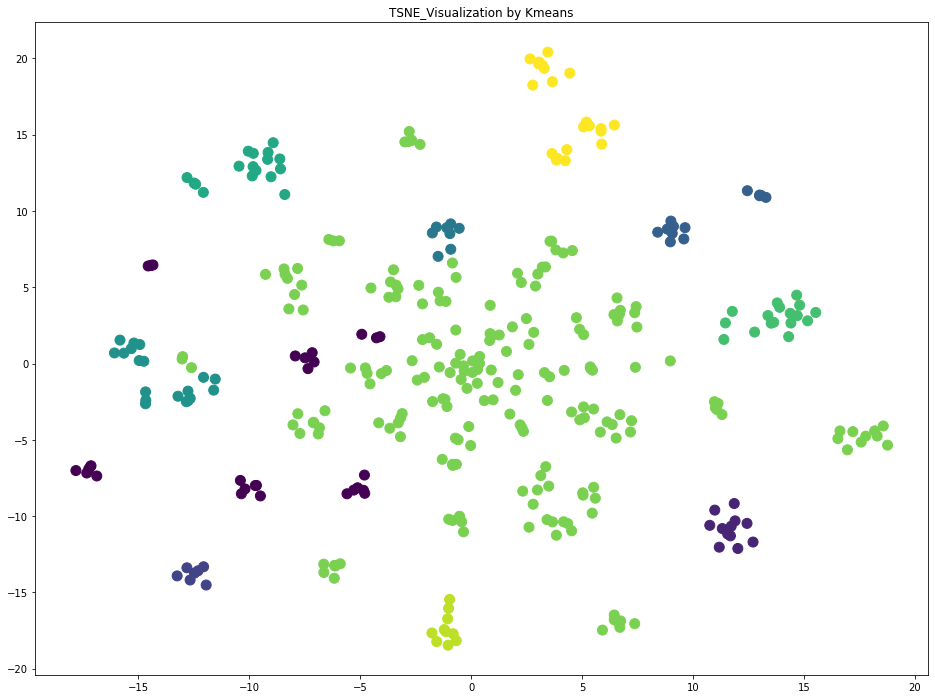

In [26]:
X_tsne = TSNE(n_components=2).fit_transform(Distance)
plt.figure(figsize = (16,12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s = 100, c = clusters2)

#for k,x,y in zip(dfs.BROKER,X_tsne[:, 0], X_tsne[:, 1]):                                     
#    plt.annotate('%s' %k, xy=(x,y), textcoords='data')

plt.title('TSNE_Visualization by Kmeans')

### 2. By variables

In [27]:
import matplotlib.cm as cm

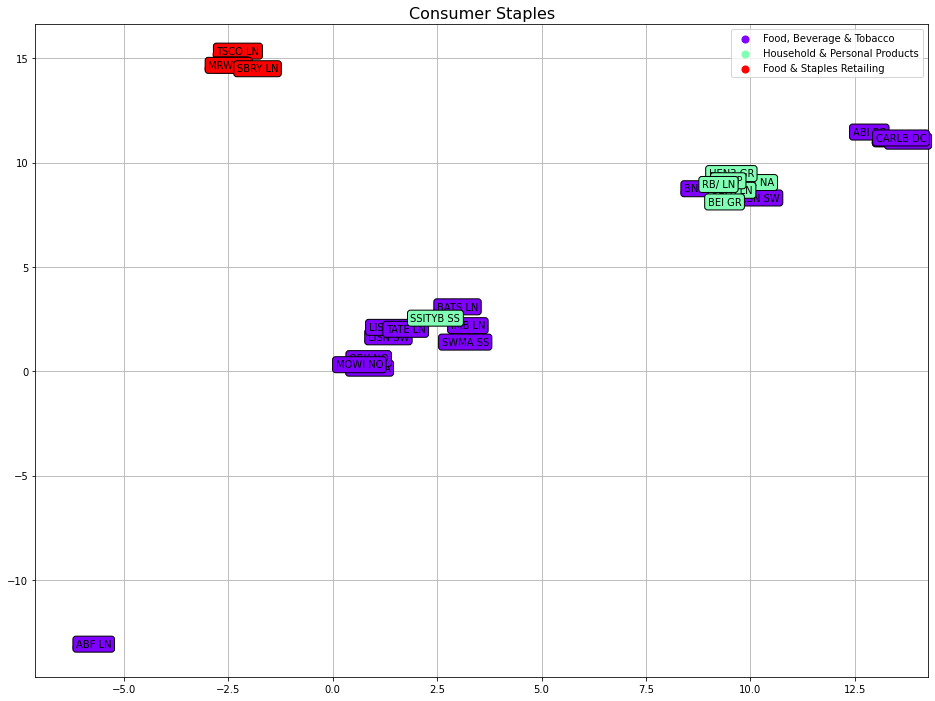

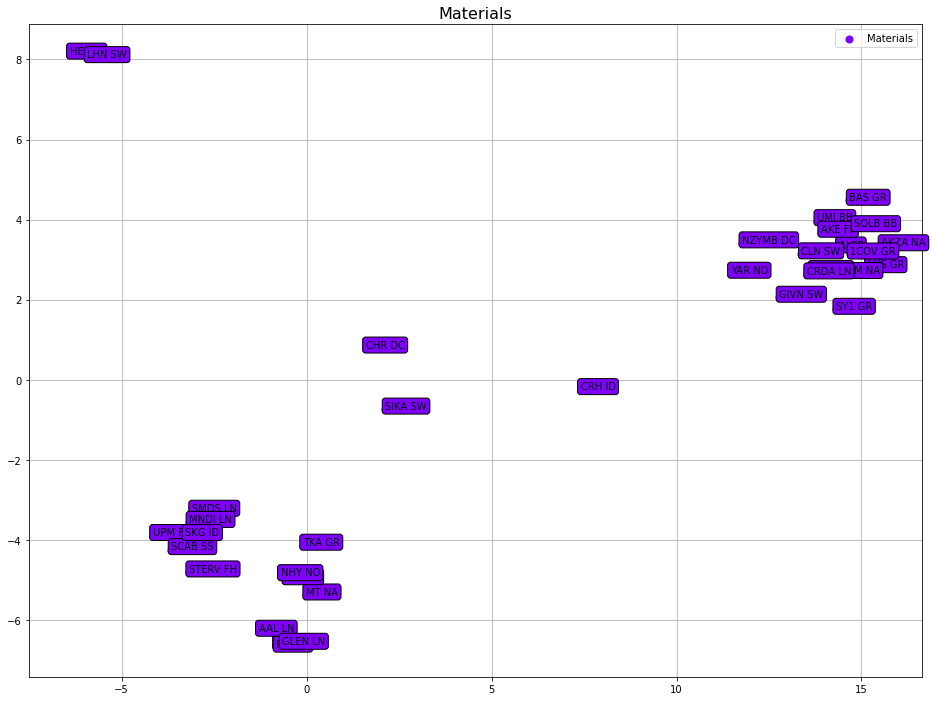

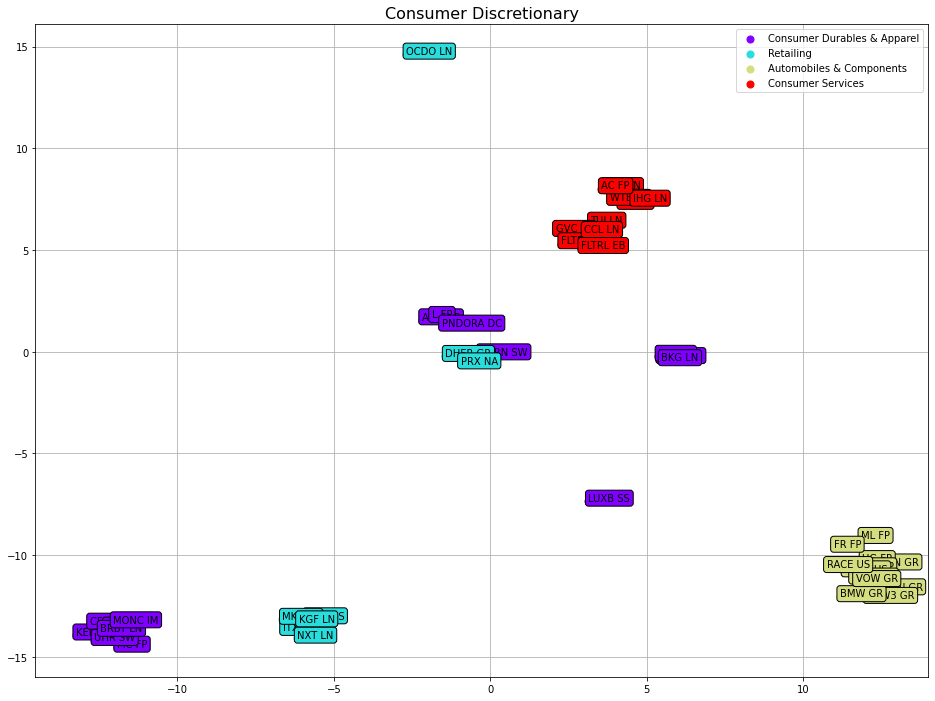

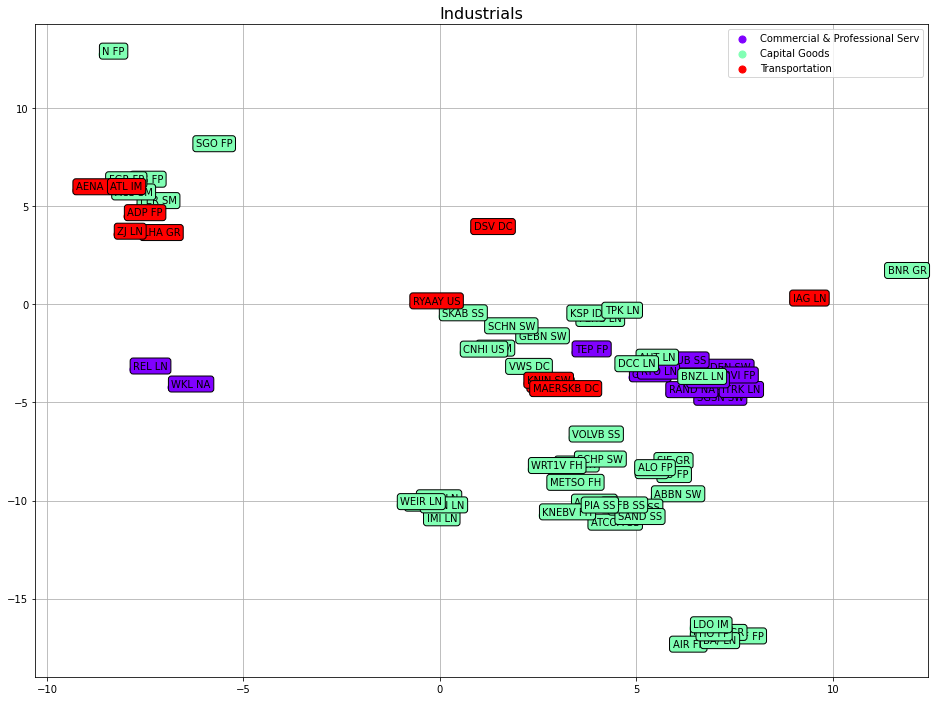

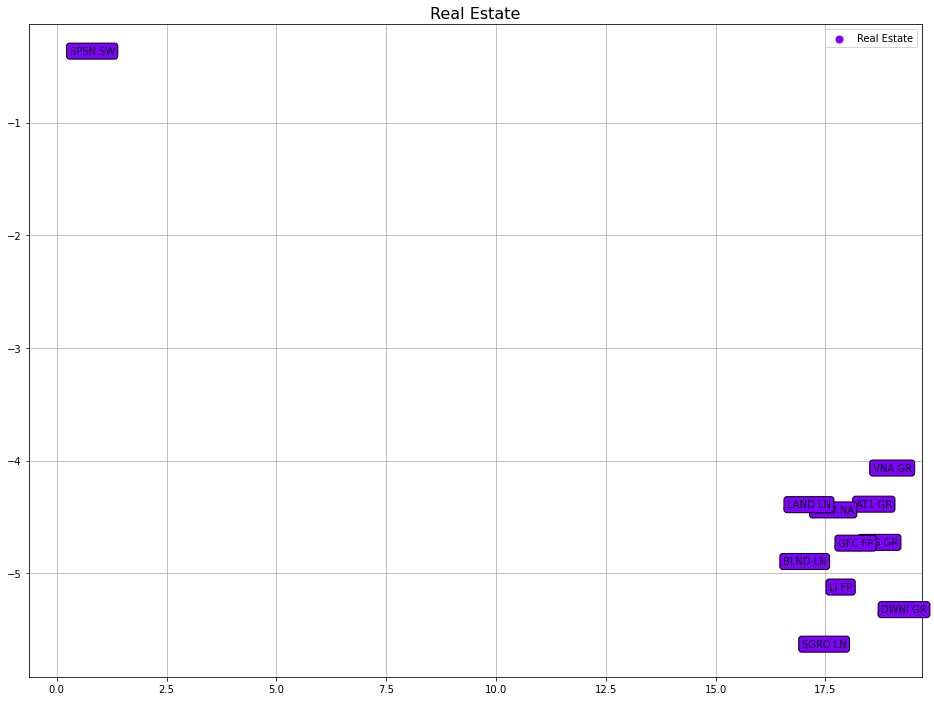

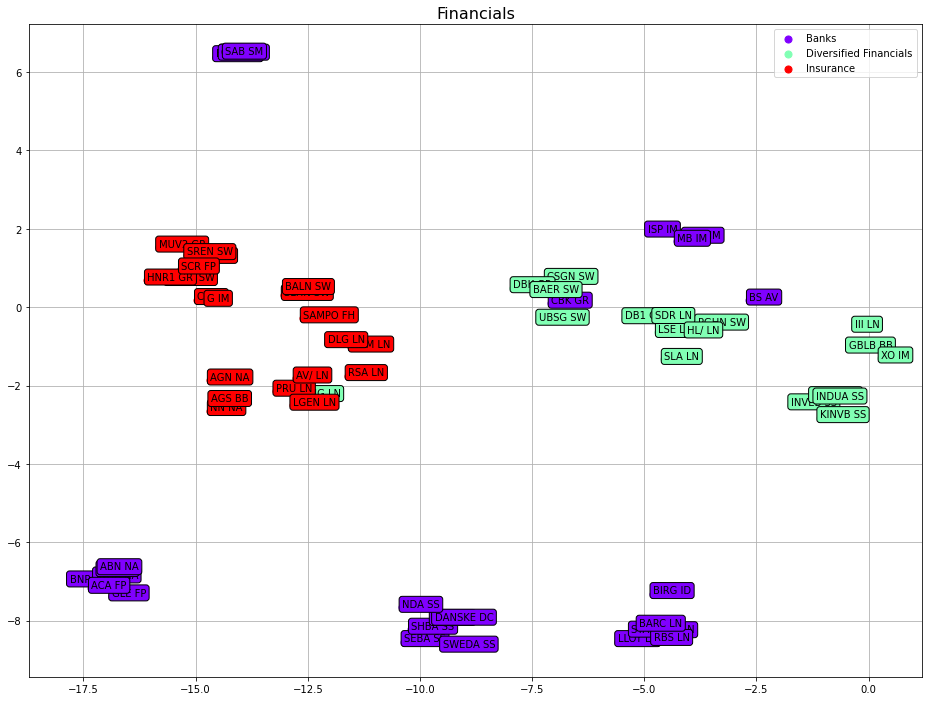

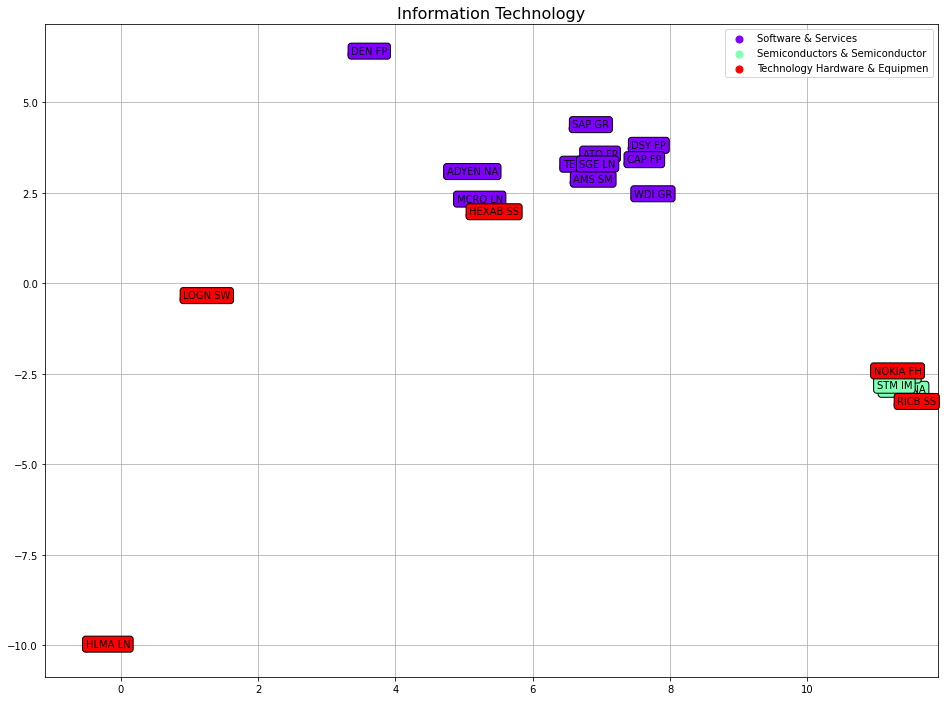

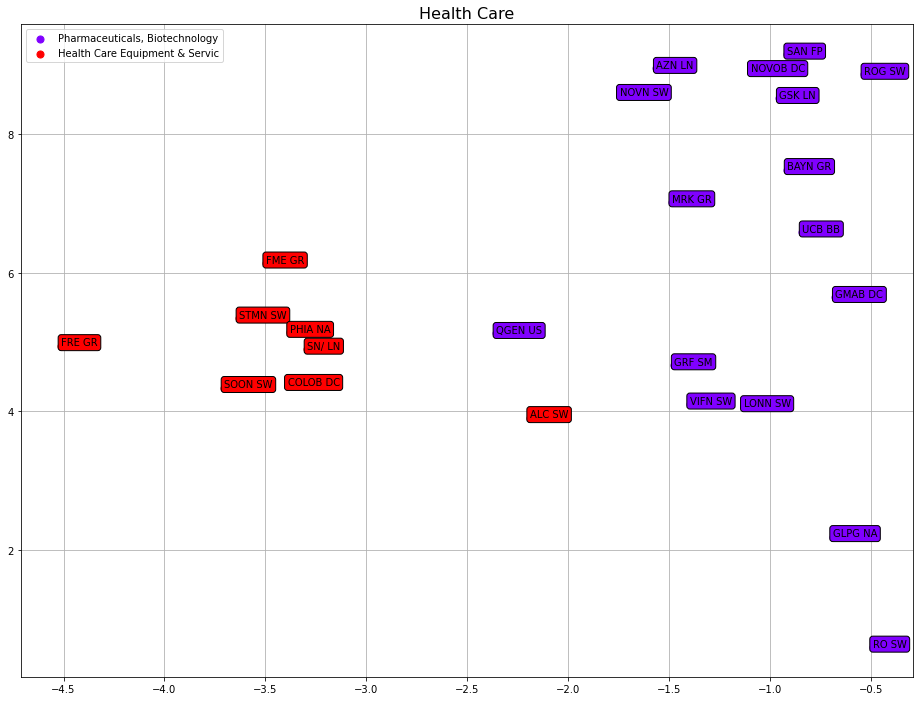

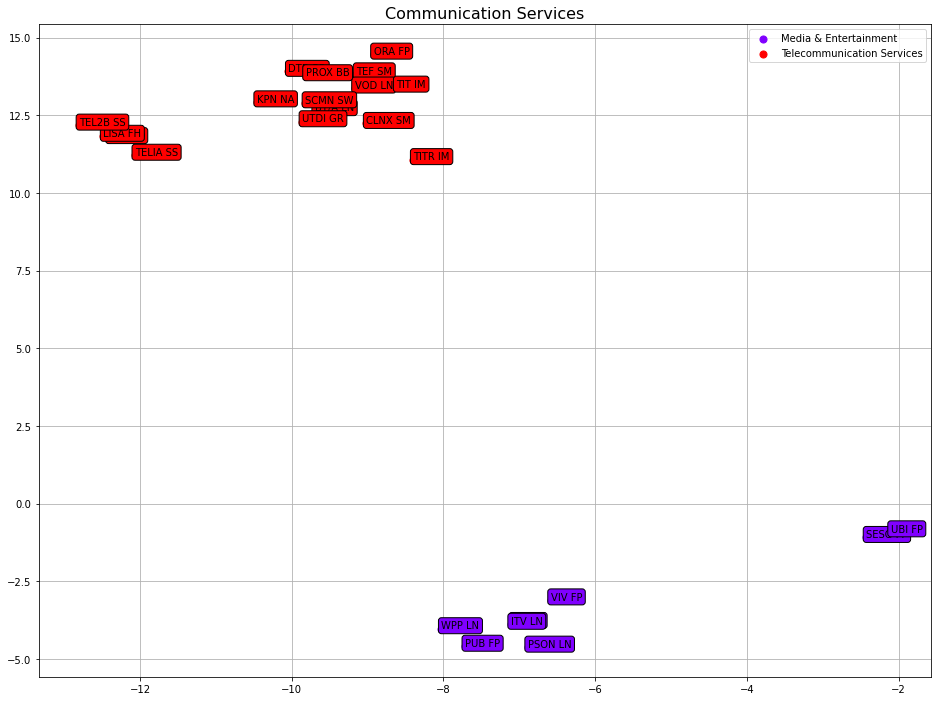

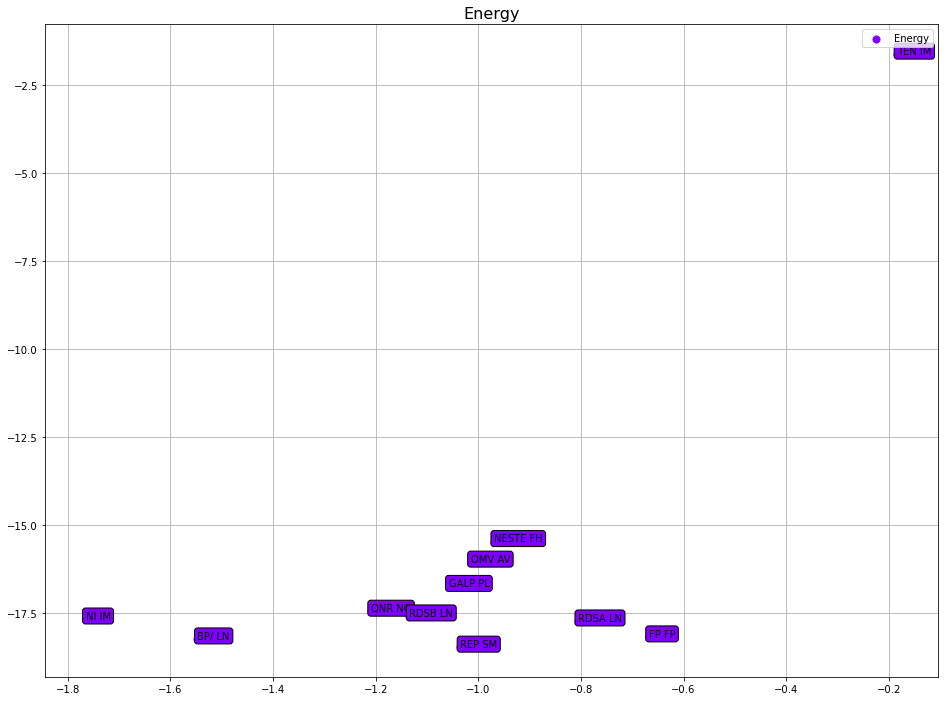

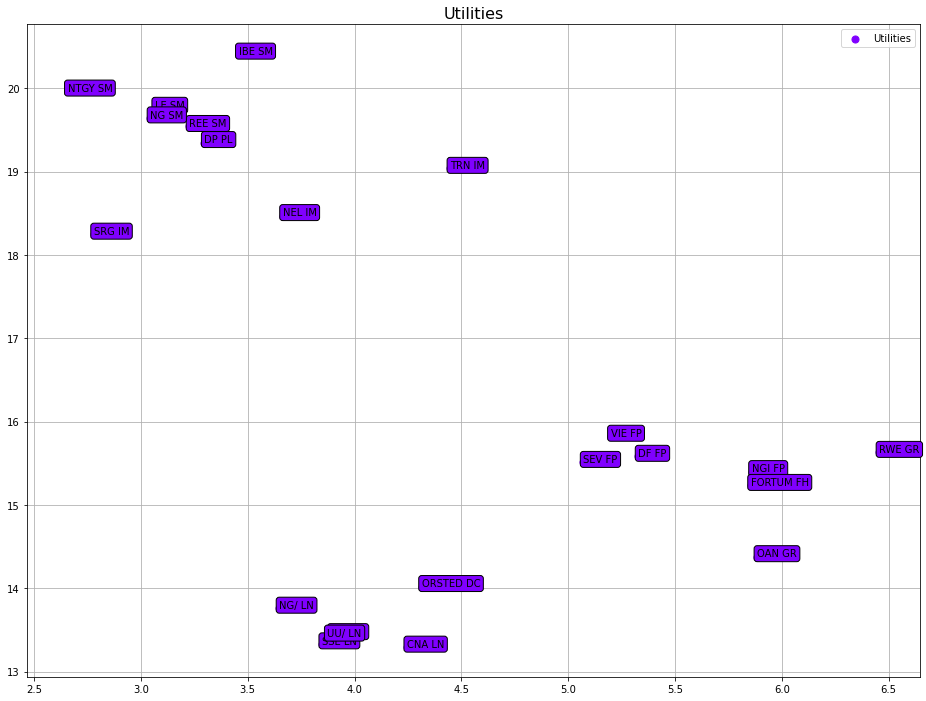

In [28]:
for i in dfs.GICS_SECTOR_NAME.unique():
    dfk = dfs[dfs.GICS_SECTOR_NAME == i]
    colors = cm.rainbow(np.linspace(0, 1, len(dfk.GICS_INDUSTRY_GROUP_NAME.unique())))

    plt.figure(figsize = (16,12))
    plt.grid()
    for y, c in zip(dfk.GICS_INDUSTRY_GROUP_NAME.unique(),colors):
        dfy = dfk[dfk.GICS_INDUSTRY_GROUP_NAME == y]
        index1 = dfy.index
        bbox=dict(boxstyle='round', fc = c)
        plt.scatter(X_tsne[index1, 0], X_tsne[index1, 1], s = 50, color=c)
        for k,x,y in zip(dfy.BBTICKER.apply(lambda x: x.strip('Equity').strip()), X_tsne[index1, 0], X_tsne[index1, 1]):
            plt.annotate('%s' %k, xy=(x,y), bbox = bbox, textcoords='data')
    plt.title(f'{i}',size = 16)
    plt.legend(dfk.GICS_INDUSTRY_GROUP_NAME.unique())
    #plt.savefig(f'{i}.jpg')

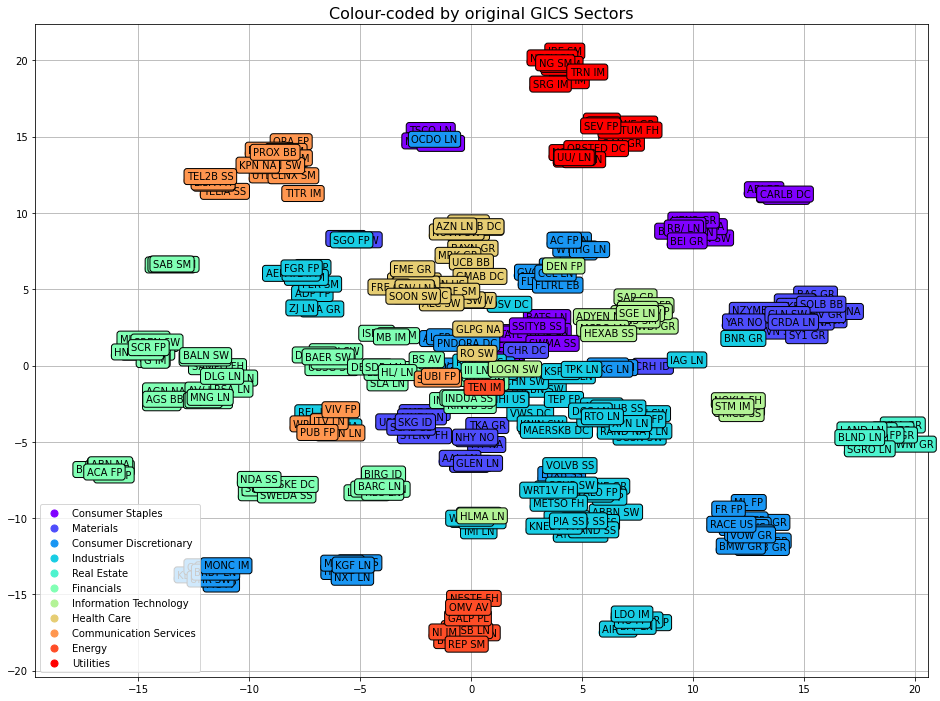

In [42]:
colors = cm.rainbow(np.linspace(0, 1, len(dfs.GICS_SECTOR_NAME.unique())))

plt.figure(figsize = (16,12))
plt.grid()
for y, c in zip(dfs.GICS_SECTOR_NAME.unique(),colors):
    dfy = dfs[dfs.GICS_SECTOR_NAME == y]
    index1 = dfy.index
    bbox=dict(boxstyle='round', fc = c)
    plt.scatter(X_tsne[index1, 0], X_tsne[index1, 1], s = 50, color=c)
    for k,x,y in zip(dfy.BBTICKER.apply(lambda x: x.strip(' Equity')), X_tsne[index1, 0], X_tsne[index1, 1]):
        
        plt.annotate('%s' %k, xy=(x,y), bbox = bbox, textcoords='data')
plt.title('Colour-coded by original GICS Sectors',size = 16)
plt.legend(dfs.GICS_SECTOR_NAME.unique(),bbox_to_anchor=(0, 0),loc="lower left")

#plt.savefig('Colour-coded by original GICS Sectors')

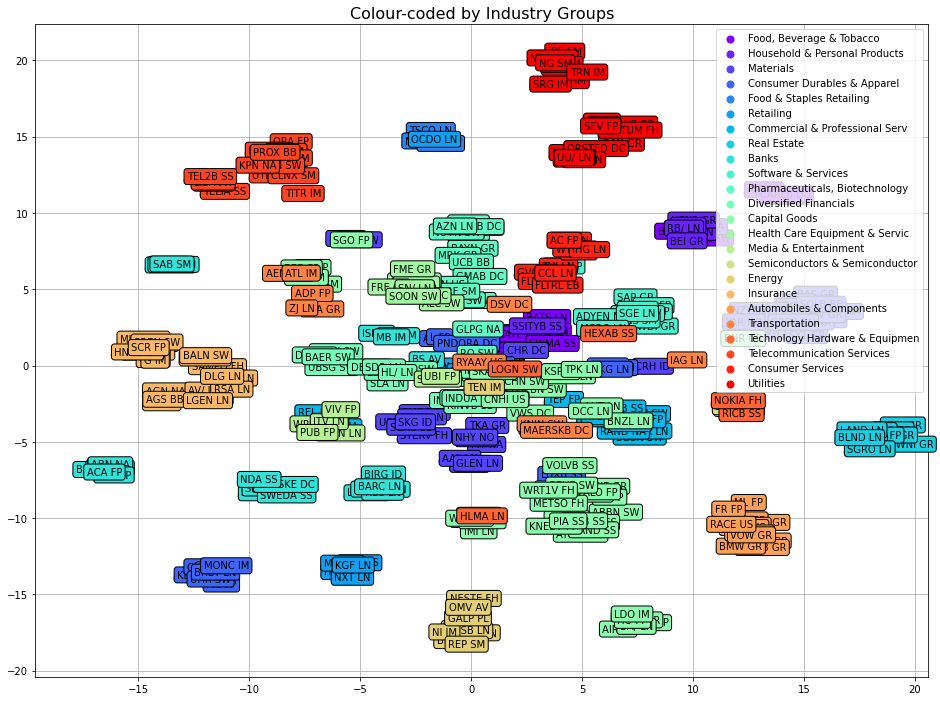

In [30]:
colors = cm.rainbow(np.linspace(0, 1, len(dfs.GICS_INDUSTRY_GROUP_NAME.unique())))

plt.figure(figsize = (16,12))
plt.grid()
for y, c in zip(dfs.GICS_INDUSTRY_GROUP_NAME.unique(),colors):
    dfy = dfs[dfs.GICS_INDUSTRY_GROUP_NAME == y]
    index1 = dfy.index
    bbox=dict(boxstyle='round', fc = c)
    plt.scatter(X_tsne[index1, 0], X_tsne[index1, 1], s = 50, color=c)
    for k,x,y in zip(dfy.BBTICKER.apply(lambda x: x.strip('Equity').strip()), X_tsne[index1, 0], X_tsne[index1, 1]):
        
        plt.annotate('%s' %k, xy=(x,y), bbox = bbox, textcoords='data')
plt.title('Colour-coded by Industry Groups',size = 16)
plt.legend(dfs.GICS_INDUSTRY_GROUP_NAME.unique())

#plt.savefig('Colour-coded by Industry Groups')

In [31]:
'''
plt.figure(figsize = (16,12))
plt.grid()
for y, c in zip(dfs.GICS_SECTOR_NAME.unique(),colors):
    index1 = dfs[dfs.GICS_SECTOR_NAME == y].index
    plt.scatter(X_tsne[index1, 0], X_tsne[index1, 1], s = 100, color=c)


for k,x,y in zip(dfs.BROKER, X_tsne[:, 0], X_tsne[:, 1]):      
    bbox=dict(boxstyle='round', fc=c)
    plt.annotate('%s' %k, xy=(x,y), bbox = bbox, textcoords='data')
    
    
plt.legend(dfs.GICS_SECTOR_NAME.unique())
'''

"\nplt.figure(figsize = (16,12))\nplt.grid()\nfor y, c in zip(dfs.GICS_SECTOR_NAME.unique(),colors):\n    index1 = dfs[dfs.GICS_SECTOR_NAME == y].index\n    plt.scatter(X_tsne[index1, 0], X_tsne[index1, 1], s = 100, color=c)\n\n\nfor k,x,y in zip(dfs.BROKER, X_tsne[:, 0], X_tsne[:, 1]):      \n    bbox=dict(boxstyle='round', fc=c)\n    plt.annotate('%s' %k, xy=(x,y), bbox = bbox, textcoords='data')\n    \n    \nplt.legend(dfs.GICS_SECTOR_NAME.unique())\n"

In [32]:
#columns = df2.drop(['BROKER','GICS_INDUSTRY_GROUP_NAME','DATE'], axis = 1).columns
#for i in range(len(columns)):
#    title = columns[i]
#    distance_from_y_axis += df2[title]*df2[title]

#X_color = plt.cm.jet(distance_from_y_axis / np.max(distance_from_y_axis + 1))

In [33]:
#X_color

In [34]:
#map_color = {-1: 'r', 1: 'g'}
#color = list(map(lambda x: map_color[x], Label)